# Chapter 9. 그래프와 시각화

- 본 책에서는 matplotlib과 matplotlib 기반의 도구들을 우선적으로 살펴봄
- matplotlib은 
    - 주로 2D 그래프를 위한 데스크톱 패키지.
    - 파이썬에서 매트랩과 유사한 인터페이스를 지원하기 위해 2002년 존 헌터가 시작.
    - 그 후 IPython과 matplotlib 커뮤니티의 협력을 통해 IPython 셸(지금은 주피터 노트북)에서 대화형 시각화를 구현해 냄.
    - 모든 운영체제의 다양한 GUI 백엔드를 지원함. 
    - PDF, SVG, JPG, PNG, BMP, GIF 등 일반적으로 널리 사용되는 벡터 포맷과 래스터 포맷으로 그래프 저장 가능. 
- 시간의 흐름에 따라 내부적으로 matplotlib을 사용하는 새로운 데이터 시각화 도구들이 생겨남. 그중 하나가 seaborn 라이브러리.

In [ ]:
# %matplotlib inline

## 9.1 matplotlip API 간략하게 살펴보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

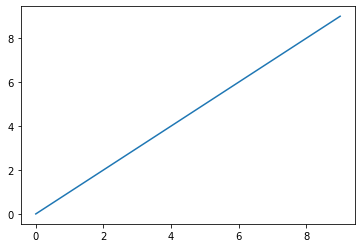

In [3]:
plt.plot(data)

> 함수에서 제공하는 옵션만 사용하는 데 그치지 않고 그 이상의 최적화를 하고 싶다면 matplotlib API도 어느 정도 알고 있어야 한다.

### 9.1.1 figure와 서브플롯
> matplotlib에서 그래프는 Figure 객체 내에 존재한다. 그래프를 위한 새로운 figure(피겨)는 plt.figure를 사용해서 생성할 수 있다.  
> plt.figure에는 다양한 옵션이 있는데 그중 figsize는 파일에 저장할 경우를 위해 만들려는 figure의 크기와 비율을 지정할 수 있다.

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

> 빈 figure로는 그래프를 그릴 수 없다.  
> add_subplot을 사용해서 최소 하나 이상의 subplots를 생성해야 한다.

In [5]:
ax1 = fig.add_subplot(2,2,1)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 첫번재를 선택하겠다는 의미 (서브 플롯은 1부터 숫자가 매겨짐)
ax2 = fig.add_subplot(2,2,2)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 두번재를 선택하겠다는 의미 (서브 플롯은 2부터 숫자가 매겨짐)
ax3 = fig.add_subplot(2,2,3)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 세번재를 선택하겠다는 의미 (서브 플롯은 3부터 숫자가 매겨짐)

> 주피터 노트북을 사용할 때는 실행되는 셀마다 그래프가 리셋된다. 따라서 복잡한 그래프를 그릴 때는 단일 노트북 셀에 그래프를 그리는 코드를 전부 입력해야 한다.

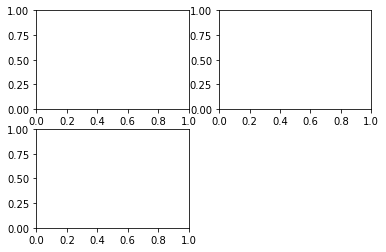

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

> 아래와 같은 명령으로 그래프를 띄우면 matplotlib은 가장 최근의 figure와 그 서브 플롯을 그린다. 
```python
plt.plot(np.random.randn(50).cumsum(), 'k--')
```

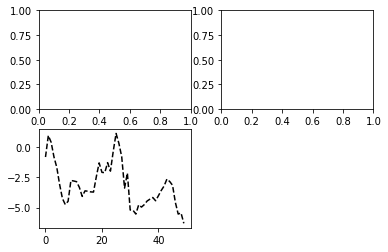

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

> 서브플롯이 없다면 서브플롯 하나를 생성한다. 이렇게 해서 `figure와 서브플롯이 생성되는 과정`을 숨겨준다.

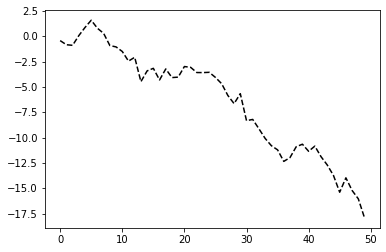

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')   # 'k--' 옵션은 검은 점선을 그리기 위한 스타일 옵션임.

> fig.add_subplot에서 반환되는 객체는 AxeSubplot인데, 각각의 인스턴스 메서드를 호출해서 다른 빈 서브플롯에 직접 그래프를 그릴 수 있다. 

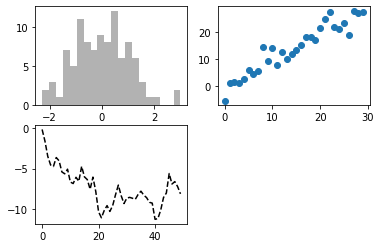

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

> matplotlib 문서에서 여러 가지 그래프 종류를 확인할 수 있다.  
> 특정한 배치에 맞추어 여러 개의 서브플롯을 포함하는 figure를 생성하는 일은 흔히 접하게 되는 업무인데 이를 위한 plt.subplots라는 편리한 메서드가 있다.  
> - 이 메서드는 NumPy 배열과 서브플롯 객체를 새로 생성하여 반환한다.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

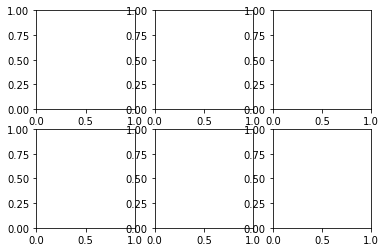

In [11]:
fig, axes = plt.subplots(2,3)
axes

> axes 배열은 axes[0, 1]처럼 2차원 배열로 쉽게 색인될 수 있어서 편리하게 사용될 수 있다.  
> 서브플롯이 같은 x축 혹은 y축을 가져야 한다면 각각 sharex와 sharey를 사용해서 지정할 수 있다. => 같은 범위 내에서 데이터를 비교해야 할 경우 특히 유용하다.  
> 별도로 지정하지 않으면 matplotlib은 각 그래프의 범위를 독립적으로 조정한다.

#### pyplot.subplots 옵션

<details>
<summary>pyplot.subplots 옵션</summary>
<div markdown="1">

|인자|설명|
|:--|:--|
|nrows|서브플롯의 로우 수|
|ncols|서브플롯의 컬럼 수|
|sharex|모든 서브플롯이 같은 x축 눈금을 사용하도록 한다(xlim 값을 조절하면 모든 서브플롯에 적용된다).|
|sharey|모든 서브플롯이 같은 y축 눈금을 사용하도록 한다(ylim 값을 조절하면 모든 서브플롯에 적용된다).|
|subplot_kw|add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전|
|**fig_kw|figure를 생성할 때 사용할 추가적인 키워드 인자. 예를 들면 plt.subplots(2,2,figsize = (8,6))|

    
</div>
</details>

#### 서브플롯 간의 간격 조절하기

> matplotlib은 서브플롯 간에 적당한 간격과 여백을 추가해준다. 이 간격은 전체 그래프의 높이와 너비에 따라 상대적으로 결정된다.  
> 서브플롯 간의 간격은 Figure 객체의 subplots_adjust 메서드를 사용해서 쉽게 바꿀 수 있다. subplots_adjust 메서드는 최상위 함수로도 존재한다.

```python
subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = None)
```

> wspace와 hspace는 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율을 조절한다.  
> 다음 코드는 서브플롯 간의 간격을 주지 않은 그래프를 생성하는 코드.

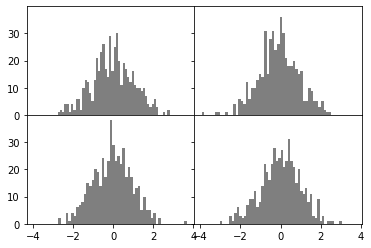

In [14]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2) : 
    for j in range(2) : 
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)

plt.subplots_adjust(wspace = 0, hspace = 0)

> 그래프를 그렸을 때 축 이름이 겹치는 경우가 있다. matplotlib은 그래프에서 이름이 겹치는지 검사하지 않기 때문에 이와 같은 경우에는 눈금 위치와 눈금 이름을 명시적으로 직접 지정해야 한다.

### 9.1.2 색상, 마커, 선 스타일

> matplotlib에서 가장 중요한 plot 함수는 `x와 y 좌표값이 담긴 배열`과 추가적으로 `색상과 선 스타일을 나타내는 축약 문자열`을 인자로 받는다.  
> 흔히 사용되는 색상을 위해 몇 가지 색상 문자열이 존재하지만 RGB 값을 직접 지정해서 색상표에 있는 어떤 색상이라도 지정할 수 있다.  
> 마커도 스타일 문자열에 포함시킬 수 있는데 색상 다음에 마커 스타일이 오고 그 뒤에 선 스타일을 지정한다.

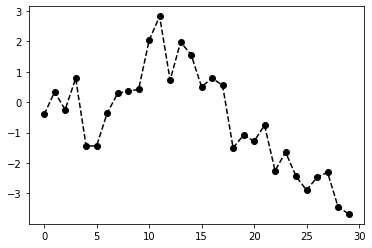

In [20]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

> 아래와 같이 표현하면 좀 더 명시적으로 표현할 수 있다.

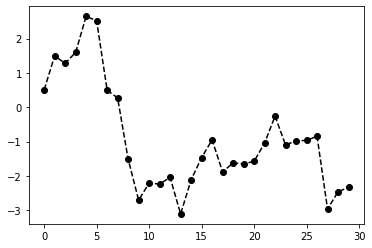

In [21]:
plt.plot(np.random.randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

> 선그래프를 보면 일정한 간격으로 연속된 지점이 연결되어 있다. 이 역시 drawstyle 옵션을 이용해서 바꿀 수 있다.  
> 여기서는 label 인자로 plot을 전달했기 때문에 plt.legend를 이용해서 각 선그래프의 범례를 추가할 수 있다.  
> 범례를 생성하려면 그래프 그릴 대 label 옵션 지정 여부와 상관없이 `반드시 plt.legend`를 호출해야 한다. (축에 대한 범례를 추가하려면 ax.legend를 호출!)

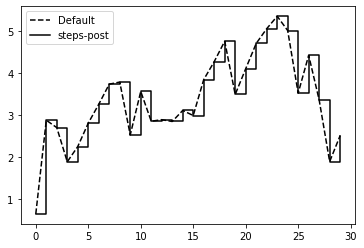

In [38]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

### 9.1.3 눈금, 라벨, 범례

- 그래프를 꾸미는 방법은 크게 2가지가 있다.
    1. pyplot 인터페이스를 사용해서 순차적으로 꾸미는 법 (matplotlib.pyplot)
    2. matplotlib이 제공하는 API를 사용해서 좀 더 객체지향적인 방법으로 꾸미는 것.
- pyplot 인터페이스는 대화형 사용에 맞추어 설계되었으며 xlim, xticks, xticklabels 같은 메서드로 이루어져 있다. 
    - 이런 메서드로 표의 범위를 지정하거나 눈금 위치, 눈금 이름을 조절할 수 있다.
    - 아무런 인자 없이 호출하면 현재 설정되어 있는 매개변수 값을 반환한다. plt.xlim 메서드는 현재 x축의 범위를 반환한다.
    - 인자를 전달하면 매개변수의 값을 설정한다. 예를 들어 plt.xlim([0,10])을 호출하면 x축의 범위가 0부터 10까지로 설정된다.
- 이 모든 메서드는 현재 활성화된 혹은 가장 최근에 생성된 AxesSubplot 객체에 대해 동작한다.
- 위에서 소개한 모든 메서드는 서브플롯 객체의 set/get 메서드로도 존재하는데, xlim이라면 ax.get_xlim과 ax.set_xlim 메서드가 존재한다.
    - 명시적인 것을 선호하는 경우 서브플롯 인스턴스 메서드를 사용하면 좋다.

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기

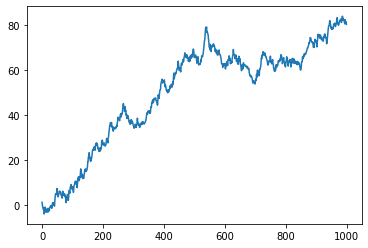

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

> x축의 눈금을 변경하기 위한 가장 쉬운 방법은 set_xticks와 set_xticklabels 메서드를 사용하는 것이다.  
> set_xticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정한다. 기본적으로 이 위치에 눈금 이름이 들어간다.  
> 하지만 다른 눈금 이름을 지정하고 싶다면 set_xticklabels를 사용하면 된다.

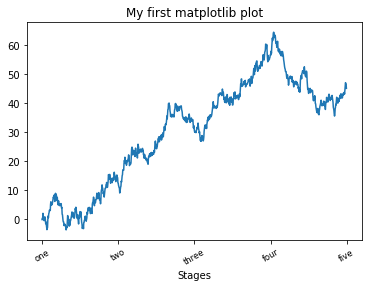

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                              rotation = 30, fontsize = 'small')
title = ax.set_title("My first matplotlib plot")
xlabel = ax.set_xlabel("Stages")

> x대신 y를 써서 같은 과정을 y축에 진행할 수 있다.  
> axes 클래스는 플롯의 속성을 설정할 수 있도록 set 메서드를 제공한다. 위 예제는 아래와 같이 작성할 수도 있다.

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

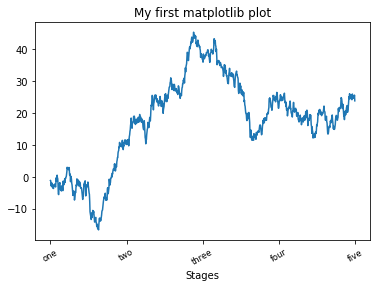

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                              rotation = 30, fontsize = 'small')

props = {
    'title' : 'My first matplotlib plot',
    'xlabel' : 'Stages',
}

ax.set(**props)

#### 범례 추가하기

> 범례를 추가하는 몇 가지 방법이 있는데 가장 쉬운 방법은 각 그래프에 label 인자를 넘기는 것이다.  
> 이렇게 하면 ax.legend()나 plt.legend()를 실행했을 대 자동으로 범례가 생성된다.  
> 범례에서 제외하고 싶은 요소가 있다면 label 인자를 넘기지 않거나 label = '_nolegend_' 옵션을 사용하면 된다.

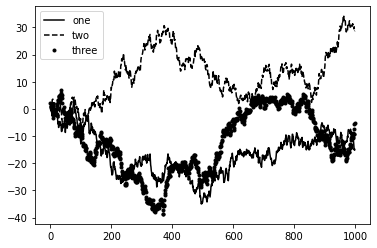

In [68]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label = 'three')

ax.legend(loc = 'best')

### 9.1.4 주석과 그림 추가하기
- 자신만의 주석을 그리고 싶은 경우 text, arrow, annotate 함수를 이용해서 추가할 수 있다.

> text 함수는 그래프 내의 주어진 좌표 (x, y)에 부가적인 스타일로 글자를 그려준다.

```python
ax.text(x,y, "Hello world!", family = "monospace", fontsize = 10)
```

> 주석은 글자와 화살표를 함께 써써 그릴 수 있다.  
> 야후! 파이낸스에서 얻은 S&P 500 지수 데이터로 그래프를 생성하고 중요한 날짜를 주석으로 추가해보자.

In [6]:
import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

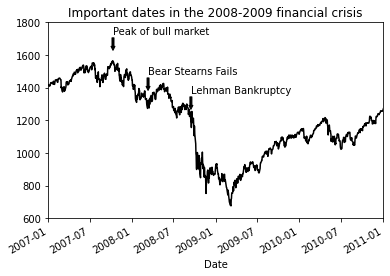

In [18]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = "k-")

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data :
    ax.annotate(label,                                                     # ax.annotate 메서드를 통해 x,y좌표로 지정한 위치에 라벨을 추가
                xy = (date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor = "black",
                                  headwidth = 4,
                                  width = 2,
                                  headlength = 4),
                horizontalalignment = "left", verticalalignment = 'top')
    
# 2007-2010 구간으로 확대
ax.set_xlim(['1/1/2007', '1/1/2011'])                                       # set_xlim, set_ylim 메서드를 이용해 그래프의 시작과 끝 경계를 직접 지정.
ax.set_ylim([600,1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")           # set_title 메서드로 그래프의 제목을 지정
    
    

> 도형을 그리려면 좀 더 신경을 써야한다.  
> matplotlib은 일반적인 도형을 표현하기 위한 patches라는 객체를 제공한다.  
> 그중 Rectangle과 Circle 같은 것은 matplotlib.pyplot에서도 찾을수 있지만 전체 모음은 `matplotlib.patches`에 있다.  
> 그래프에 도형을 추가하려면 patches 객체인 shp를 만들고 서브플롯에 `ax.add_patch(shp)`를 호출한다.

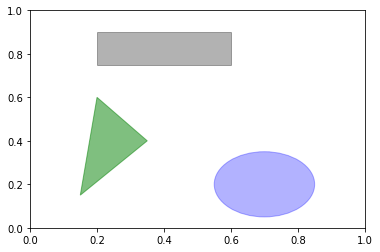

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7,0.2), 0.15, color ='b', alpha = 0.3)
pgon = plt.Polygon([[0.15,0.15], [0.35, 0.4], [0.2, 0.6]],
                   color = 'g', alpha =0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)